In [1]:
#python scrape data from various links


import csv
from urllib.request import urlopen
import urllib.request
import ssl
import re
import pandas as pd
import requests
from w3lib import html
from lxml import etree

url = "https://protocol.un.org/dgacm/pls/site.nsf/ProtocolServices.xsp"
header = headers = {
"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_0) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.56 Safari/535.11"}


request = urllib.request.Request(url, headers=header)
res = urllib.request.urlopen(request)

context = ssl._create_unverified_context()
res = urllib.request.urlopen(request, context=context)

from bs4 import BeautifulSoup

    
with open("datapure_only_urls.csv", "r") as f_urls, open("mandate13.csv", "w", newline="") as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerow(['url', 'mandate'])

    for url in f_urls:
        url = url.strip()
        html = requests.get(url).content
        soup = BeautifulSoup(html, "html.parser")
        b = soup.find_all('p')
        b = str(b)
        mandate = re.sub('<[^<]+?>', '', b).replace('\n', '').strip()

        csv_output.writerow([url, mandate])

In [2]:
import pandas as pd

df = pd.read_csv("mandate13.csv")

df.head

<bound method NDFrame.head of                                                    url  \
0    http://www.unodc.org/unodc/en/commissions/CCPC...   
1    http://www.unodc.org/unodc/en/commissions/CND/...   
2    https://www.un.org/en/development/desa/populat...   
3    https://unctad.org/en/Pages/CSTD/CSTD-Mandate....   
4    https://www.un.org/development/desa/dspd/unite...   
..                                                 ...   
190  https://www.unog.ch/80256EDD006AC19C/(httpHome...   
191  https://www.ohchr.org/EN/AboutUs/Pages/WhoWeAr...   
192          https://eird.org/americas/we/mandate.html   
193           https://unctad.org/en/Pages/aboutus.aspx   
194                   https://unon.org/content/mandate   

                                               mandate  
0    [, The Commission on Crime Prevention and Crim...  
1    [The Commission on Narcotic Drugs (CND) was es...  
2    [A Population Commission was established by th...  
3    [ , United Nations Conference on Trade a

In [3]:
#then clean the data, comebine title, type



In [9]:


import pandas as pd
data_xls = pd.read_excel('data_desire_final3.xlsx', index_col=None)
data_xls.to_csv('your_csv1.csv', encoding='utf-8')



In [10]:
#cleaned dataset 

df = pd.read_csv("your_csv1.csv")

df.head


<bound method NDFrame.head of      Unnamed: 0                                                 UN  \
0             0                      Office of Legal Affairs (OLA)   
1             1     Policy, Evaluation and Training Division (DPO)   
2             2  Office of the High Representative for the Leas...   
3             3             United Nations Administrative Tribunal   
4             4  Central Planning and Coordination Division (DG...   
..          ...                                                ...   
189         189  Committee of Experts on Global Geospatial Info...   
190         190              Development Coordination Office (DCO)   
191         191  Office of the Special Representative of the Se...   
192         192                    United Nations Office at Vienna   
193         193                                 UN Global Compact    

                                                  link UN Principal Organs  \
0                https://legal.un.org/ola/mission.a

In [11]:
# then start topic modeling 

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [34]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'United', 'Nations', 'UN', 'Secretary', 'General', 'member','state','Assembly','organization','international', 'copyright', 'about', 'council'
                  , 'members', 'iasc', 'un','wg','ga',
                  'drr', 'postal', 'operations', 'united','nations', 'posta', 'council',
                  'un', 'unep', 'res', 'arabic','chinese' ,  'french', 'russian',
                  'russian_spanish', 'resolution', 'adopted', 'forum', 'wssd', 'chair', 'resolution','committee',
                  'established', 'annex','claims', 'unodc', 'article', 'tel', 'tel',
                  'plaza', 'des', 'floor', 'spanish', 'unidir', 'ipcc', 'unicri', 
                  'wmo', 'general', 'organizations', 'may','also', 'ilo', 'office', 
                  'groups', 'eclac', 'eca', 'unrwa', 'ecosoc', 'th_session_th_session',
                  'iaea', 'unwto', 'also', 'unops', 'countries', 'unfpa', 'iasmn', 
                  'fao', 'programme', 'unff', 'australia', 'cpf', 'ipf', 'iff',
                  'dec', 'desa', 'july', 'escwa', 'iom', 'unitar', 'mso', 'fb', 'incaf', 'icc', 
                  'world_bank', 'usatel', 'opcw', 'de', 'signature', 'assembly', 'ictn', 'dtn', 
                  'republic', 'list', 'st_sgb', 'itc', 'wto', 'imf', 'sdrs', 'organisations',
                  'ccpcj', 'among', 'imo', 'unaids', 'co', 'elected', 'mr', 
                  'list', 'since', 'new_york', 'new', 'cco', 'board', 'boards', 'sponsors', 
                  'ends', 'december', 'commission', 'wipo', 'parties', 'including', 'one', 
                  'theme', 'december', 'email', 'ctbto', 'test', 'per_cent', 'itu', 'wfp', 
                  'november', 'september', 'iaeg', 'english', 'year', 'meets', 'held', 
                  'th', 'icao', 'rapidly', 'seats', 'structure', 'comprises', 'ifrc', 'consortia', 
                  'quarterly', 'rotating', 'march', 'group', 'unicef', 'secretary', 'notice', 
                  'system', 'department', 'dac', 'edge', 'adopts', 'brings_together', 
                  'unido', 'unidos', 'decade', 'au', 'desks', 'well', 'provides', 'escap', 
                  'unfi', 'escaps', 'work', 'meetings', 'unrisd', 'unrisds', 'unssc', 'english', 
                  'billion', 'activities', 'states', 'system', 'division', 'undg', 'network', 'lead', 
                  'special_representative', 'partners', 'works', 'impartial', 'cnd', 'commitments', 'supervising',
                  'cnd_tweets', 'accelerating', 'measures', 'could', 'ban', 'working', 'fcl', 'facility',
                  'governors', 'drafted', 'ifads', 'alternate', 'ifad', 'csocd', 'bureau', 
                  'chief_executives', 'content_type_navigate_documents', 'contact_us_sitemap_bookmarks', 
                  'type_navigate_content', 'caac', 'headquarters', 'five', 'world_bank', 
                  'june', 'years', 'enhance', 'process', 'provided', 'world', 'fax', 'content_type_contact_us', 
                  'secretariat_terms_disclaimers_contact', 'sitemap_bookmarks_chief_executives', 
                  'plazanew_york', 'hlcm', 'read', 'more','terms', 'years', 'annual', 
                  'based', 'fax_website_www', 'world_bank', 'fax', 'content_type_contact_us', 
                  'secretariat_terms_disclaimers_contact', 'sitemap_bookmarks_chief_executives', 
                  'plazanew_york', 'ocha', ])





In [35]:
df = pd.read_csv("your_csv1.csv")

df['mandate_processed'] = df['Mandate'].map(lambda x: re.sub('[,\.!?]', '', x))
df['mandate_processed'].head()

0    Mission\nTo provide a unified central legal se...
1    [In partnership with the United Nations Depart...
2    [About UN-OHRLLS The United Nations Office of ...
3    [   United Nations \n\t\t\tAdministrative Trib...
4    [The two major planks of the Departments confe...
Name: mandate_processed, dtype: object

In [36]:
data = df.Mandate.values.tolist()

data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

data = [re.sub('\s+', ' ', sent) for sent in data]

data = [re.sub("\'", "", sent) for sent in data]

data = [re.sub("''", "", sent) for sent in data]

pprint(data[:1])

['Mission To provide a unified central legal service for the Secretariat and '
 'the principal and other organs of the United Nations To contribute to the '
 'progressive development and codification of international public and trade '
 'law To promote the strengthening and development as well as the effective '
 'implementation of the international legal order for the seas and oceans To '
 'register and publish treaties, and to perform the depositary functions of '
 'the Secretary-General. The Office of Legal Affairs seeks to achieve this: '
 'Through the provision of legal services on questions of international and '
 'national, public, private, procedural and administrative law By providing '
 'substantive secretariat functions to United Nations bodies By contributing '
 'to the understanding, acceptance and consistent application of the 1982 '
 'United Nations Convention on the Law of the Sea and related implementing '
 'Agreements Through the expeditious processing and publication

In [37]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['mission', 'to', 'provide', 'unified', 'central', 'legal', 'service', 'for', 'the', 'secretariat', 'and', 'the', 'principal', 'and', 'other', 'organs', 'of', 'the', 'united', 'nations', 'to', 'contribute', 'to', 'the', 'progressive', 'development', 'and', 'codification', 'of', 'international', 'public', 'and', 'trade', 'law', 'to', 'promote', 'the', 'strengthening', 'and', 'development', 'as', 'well', 'as', 'the', 'effective', 'implementation', 'of', 'the', 'international', 'legal', 'order', 'for', 'the', 'seas', 'and', 'oceans', 'to', 'register', 'and', 'publish', 'treaties', 'and', 'to', 'perform', 'the', 'depositary', 'functions', 'of', 'the', 'secretary', 'general', 'the', 'office', 'of', 'legal', 'affairs', 'seeks', 'to', 'achieve', 'this', 'through', 'the', 'provision', 'of', 'legal', 'services', 'on', 'questions', 'of', 'international', 'and', 'national', 'public', 'private', 'procedural', 'and', 'administrative', 'law', 'by', 'providing', 'substantive', 'secretariat', 'functi

In [38]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words_nostops = remove_stopwords(data_words)

data_all_cleaned = trigram_mod[bigram_mod[data_words_nostops]]
# See trigram example
print(trigram_mod[bigram_mod[data_words_nostops[0]]])

['mission', 'provide', 'unified', 'central', 'legal', 'service', 'secretariat', 'principal', 'organs', 'contribute', 'progressive', 'development', 'codification', 'public', 'trade', 'law', 'promote', 'strengthening', 'development', 'effective', 'implementation', 'legal', 'order', 'seas', 'oceans', 'register', 'publish', 'treaties', 'perform', 'depositary', 'functions', 'legal', 'affairs', 'seeks', 'achieve', 'provision', 'legal', 'services', 'questions', 'national', 'public', 'private', 'procedural', 'administrative', 'law', 'providing', 'substantive', 'secretariat', 'functions', 'bodies', 'contributing', 'understanding', 'acceptance', 'consistent', 'application', 'convention', 'law', 'sea', 'related', 'implementing', 'agreements', 'expeditious', 'processing', 'publication', 'treaty', 'related', 'actions', 'treaties', 'registered', 'deposited', 'providing', 'assistance', 'matters', 'related', 'treaty', 'law']


In [39]:
# Create Dictionary
id2word = corpora.Dictionary(data_all_cleaned)

# Create Corpus
texts = data_all_cleaned

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 4), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 3), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 2), (59, 1), (60, 1)]]


In [40]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [21]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"peacekeeping" + 0.010*"training" + 0.010*"media" + 0.010*"support" + '
  '0.009*"staff" + 0.009*"issues" + 0.008*"service" + 0.008*"information" + '
  '0.007*"guidance" + 0.007*"evaluation"'),
 (1,
  '0.032*"session" + 0.011*"world" + 0.010*"food" + 0.010*"geneva" + '
  '0.008*"economic" + 0.008*"security" + 0.008*"conference" + 0.007*"april" + '
  '0.007*"social" + 0.007*"four"'),
 (2,
  '0.020*"development" + 0.014*"security" + 0.013*"support" + 0.008*"social" + '
  '0.008*"experts" + 0.008*"information" + 0.008*"mandate" + 0.008*"peace" + '
  '0.007*"implementation" + 0.007*"economic"'),
 (3,
  '0.055*"counter_terrorism" + 0.016*"strategy" + 0.015*"research" + '
  '0.010*"inspection" + 0.009*"institute" + 0.009*"training" + 0.008*"living" '
  '+ 0.008*"inspectors" + 0.008*"aids" + 0.008*"hiv_aids"'),
 (4,
  '0.066*"indigenous_peoples" + 0.027*"indigenous" + 0.025*"rights" + '
  '0.018*"declaration" + 0.017*"permanent" + 0.014*"issues" + 0.009*"goal" + '
  '0.006*"spec

In [22]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_all_cleaned, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.086628924396052

Coherence Score:  0.36749460040265874


In [41]:
mallet_path = '/Users/suetko/Desktop/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [42]:
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_all_cleaned, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('management', 0.06603301650825413),
   ('staff', 0.026513256628314157),
   ('common', 0.01950975487743872),
   ('issues', 0.018509254627313655),
   ('practices', 0.018009004502251125),
   ('strategic', 0.016008004002001),
   ('technology', 0.015507753876938469),
   ('administrative', 0.015007503751875938),
   ('procurement', 0.014507253626813406),
   ('evaluation', 0.01200600300150075)]),
 (6,
  [('session', 0.07037974683544304),
   ('executive', 0.05518987341772152),
   ('development', 0.03645569620253165),
   ('special', 0.02329113924050633),
   ('issues', 0.021772151898734177),
   ('population', 0.018734177215189874),
   ('sessions', 0.01620253164556962),
   ('term', 0.014177215189873417),
   ('january', 0.014177215189873417),
   ('permanent', 0.013164556962025316)]),
 (5,
  [('regional', 0.039227166276346606),
   ('national', 0.02576112412177986),
   ('global', 0.025175644028103045),
   ('secretariat', 0.024004683840749413),
   ('capacity', 0.02107728337236534),
   ('offic

In [43]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [45]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_all_cleaned, start=2, limit=40, step=6)

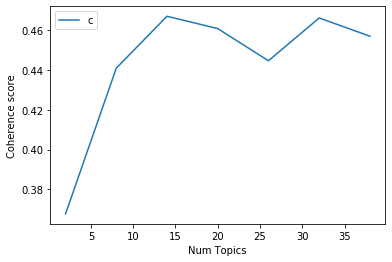

In [46]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [47]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3676
Num Topics = 8  has Coherence Value of 0.441
Num Topics = 14  has Coherence Value of 0.4671
Num Topics = 20  has Coherence Value of 0.4609
Num Topics = 26  has Coherence Value of 0.4447
Num Topics = 32  has Coherence Value of 0.4663
Num Topics = 38  has Coherence Value of 0.4571


In [49]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.035*"support" + 0.033*"electoral" + 0.025*"political" + '
  '0.023*"electoral_assistance" + 0.019*"role" + 0.019*"elections" + '
  '0.016*"mandate" + 0.015*"provide" + 0.015*"human_rights" + '
  '0.015*"assistance"'),
 (1,
  '0.069*"executive" + 0.065*"session" + 0.028*"food" + 0.026*"governing" + '
  '0.022*"functions" + 0.021*"population" + 0.021*"undp" + 0.019*"special" + '
  '0.018*"disarmament" + 0.016*"conference"'),
 (2,
  '0.117*"development" + 0.055*"social" + 0.038*"economic" + '
  '0.037*"sustainable" + 0.030*"global" + 0.026*"action" + 0.024*"issues" + '
  '0.024*"policy" + 0.022*"cooperation" + 0.020*"support"'),
 (3,
  '0.046*"global" + 0.029*"research" + 0.021*"institute" + 0.018*"environment" '
  '+ 0.018*"strategy" + 0.017*"human" + 0.016*"development" + '
  '0.015*"disaster_risk_reduction" + 0.014*"sustainable" + '
  '0.012*"communities"'),
 (4,
  '0.046*"security" + 0.026*"mandate" + 0.024*"experts" + 0.022*"sanctions" + '
  '0.021*"implementation" + 0.020*

In [50]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.1063,"convention, website_www, mandate_amp, caribbea...",Mission To provide a unified central legal ser...
1,1,12.0,0.8387,"training, operational, issues, responsible, oc...",[In partnership with the United Nations Depart...
2,2,2.0,0.4995,"development, social, economic, sustainable, gl...","[About UN-OHRLLS, The United Nations Office of..."
3,3,11.0,0.3299,"staff, administrative, management, common, pra...","[, , United Nations Administrative Tribunal, ,..."
4,4,7.0,0.4212,"management, information, services, meeting, da...",[The two major planks of the Departments confe...
5,5,7.0,0.1777,"management, information, services, meeting, da...",[ The work of the Documentation Division hinge...
6,6,7.0,0.2723,"management, information, services, meeting, da...",[The staff members of the General Assembly and...
7,7,7.0,0.2997,"management, information, services, meeting, da...",[Within the deliberative work of the United Na...
8,8,11.0,0.4238,"staff, administrative, management, common, pra...",[The UN Ethics Office promotes an ethical orga...
9,9,16.0,0.4210,"mechanism, related, inter_agency, secretariat,...",[The United Nations System Standing Committee ...


In [ ]:
A more coherent and coordinated delivery of UN services at the country level has been a long-agreed goal.

In order to enhance the efficiency and impact of the UN system in the delivery of critical areas of development, environment, and humanitarian assistance as well as to avoid duplication of work, different UN agencies must work together as "One UN".

However, partnerships between UN agencies can be complicated due to changes in name, reporting structure and/or size of various departments. Different new initiatives, task-forces, working-group, reforms established also contribute to the complexity of the UN system. For instance, there are already over 100 UN entities when one looks at the UN System Chart and there are many other commities etc. are not on the chart.

By mapping the mandates of each UN agency, it provides a clearer understanding for interested parties (both internal and external) regarding which entity is doing what exactly, hence identify possible opportunities for collaboration and leverage the capacity to better deliver the SDGs.